In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import cantera as ct
import matplotlib.pyplot as plt
import json

# Importing packages
import feedstock as fs
import pp
import gasifier as g
import fuel as fu
import energy as en
import outputs as op

For species Fe(c), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 4.2881898

For species Fe(c), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 3.425820683333331

For species Fe(c), discontinuity in s/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  0.0
	Value computed using high-temperature polynomial: 8.486560101557188

For species Cr(cr), discontinuity in cp/R detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  749.1520512400002
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in h/RT detected at Tmid = 1000.0
	Value computed using low-temperature polynomial:  113.24055562733336
	Value computed using high-temperature polynomial: 0.0

For species Cr(cr), discontinuity in s/R detec

In [2]:
# T = 800 + 273.15 # K
# ER = 0 # pyrolisis test
# P = ct.one_atm

In [3]:
# fuelID = 'Bagasse0'
# moist = fu.moisture(fuelID)
# results = g.gasifier(fuelID, moist=moist, T=T, P=P, air=ER)
# report = results[0]
# print(report['H2']*100, report['CO']*100, report['CO2']*100, report['CH4']*100, report['N2']*100, report['O2']*100)

In [4]:
# BARATIERI 2008
fuelID = 'Pine2'
moist = fu.moisture(fuelID)
T_list = np.arange(400, 1200+1, 1)
ER = 0 # pyrolisis test
P = ct.one_atm

species = ['H2', 'CO', 'CO2', 'CH4', 'H2O']

y1 = np.zeros((len(T_list), len(species)))

for i, t in enumerate(T_list):
    results = g.gasifier(fuelID, moist=moist, T=t+273.15, P=P, air=ER)
    report = results[0]
    for j, sp in enumerate(species):
        y1[i,j] = report[sp]

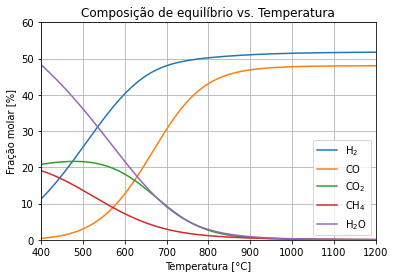

In [5]:
fig1 = plt.figure()
plt.plot(T_list, y1[:,0]*100, label='$\mathregular{H_2}$')
plt.plot(T_list, y1[:,1]*100, label='$\mathregular{CO}$')
plt.plot(T_list, y1[:,2]*100, label='$\mathregular{CO_2}$')
plt.plot(T_list, y1[:,3]*100, label='$\mathregular{CH_4}$')
plt.plot(T_list, y1[:,4]*100, label='$\mathregular{H_2O}$')
plt.legend()
plt.grid()
plt.xlim(T_list[0], T_list[-1])
plt.ylim(0, 60)
plt.xlabel('Temperatura [°C]')
plt.ylabel('Fração molar [%]')
plt.title('Composição de equilíbrio vs. Temperatura')
plt.savefig('results/Baratieri1')
plt.show()

In [6]:
# BARATIERI 2008
fuelID = 'Pine2'
moist = fu.moisture(fuelID)
P_list = np.arange(0.1, 80+0.1, 0.1)
ER = 0 # pyrolisis test
T = 800

species = ['H2', 'CO', 'CO2', 'CH4', 'H2O']

y2 = np.zeros((len(P_list), len(species)))

for i, p in enumerate(P_list):
    results = g.gasifier(fuelID, moist=moist, T=T+273.15, P=p*10**5, air=ER)
    report = results[0]
    for j, sp in enumerate(species):
        y2[i,j] = report[sp]

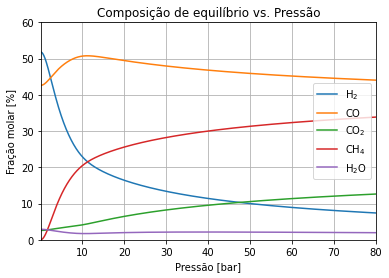

In [7]:
fig2 = plt.figure()
plt.plot(P_list, y2[:,0]*100, label='$\mathregular{H_2}$')
plt.plot(P_list, y2[:,1]*100, label='$\mathregular{CO}$')
plt.plot(P_list, y2[:,2]*100, label='$\mathregular{CO_2}$')
plt.plot(P_list, y2[:,3]*100, label='$\mathregular{CH_4}$')
plt.plot(P_list, y2[:,4]*100, label='$\mathregular{H_2O}$')
plt.legend()
plt.grid()
plt.xlim(P_list[0], P_list[-1])
plt.ylim(0, 60)
plt.xlabel('Pressão [bar]')
plt.ylabel('Fração molar [%]')
plt.title('Composição de equilíbrio vs. Pressão')
plt.savefig('results/Baratieri2')
plt.show()

In [8]:
# BARATIERI 2008
fuelID = 'Pine2'
moist = fu.moisture(fuelID)
ER_list = np.arange(0, 1+0.01, 0.01)
T = 800 # °C
P = 1 # bar

species = ['H2', 'CO', 'CO2', 'CH4', 'H2O', 'N2']

y3 = np.zeros((len(ER_list), len(species)))

for i, er in enumerate(ER_list):
    results = g.gasifier(fuelID, moist=moist, T=T+273.15, P=P*10**5, air=er)
    report = results[0]
    for j, sp in enumerate(species):
        y3[i,j] = report[sp]

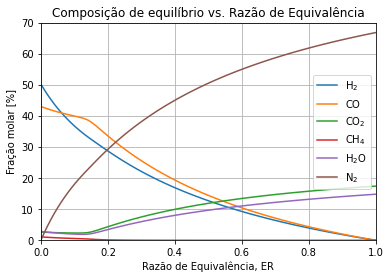

In [9]:
fig3 = plt.figure()
plt.plot(ER_list, y3[:,0]*100, label='$\mathregular{H_2}$')
plt.plot(ER_list, y3[:,1]*100, label='$\mathregular{CO}$')
plt.plot(ER_list, y3[:,2]*100, label='$\mathregular{CO_2}$')
plt.plot(ER_list, y3[:,3]*100, label='$\mathregular{CH_4}$')
plt.plot(ER_list, y3[:,4]*100, label='$\mathregular{H_2O}$')
plt.plot(ER_list, y3[:,5]*100, label='$\mathregular{N_2}$')
plt.legend()
plt.grid()
plt.xlim(ER_list[0], ER_list[-1])
plt.ylim(0, 70)
plt.xlabel('Razão de Equivalência, ER')
plt.ylabel('Fração molar [%]')
plt.title('Composição de equilíbrio vs. Razão de Equivalência')
plt.savefig('results/Baratieri3')
plt.show()

In [10]:
cyp = "Cypress"
hem = "Hemlock"
spf = "SPF"
ced = "Cedar"
ps = "PS"
mix = "Mixed"
avg = "Average"

fuels = [cyp, cyp, spf, hem, hem, hem, hem, spf, hem, cyp, hem, ps, mix, mix, mix]
moist = [22.0, 9.7, 10.5, 10.0, 8.8, 9.2, 11.7, 11.3, 15.0, 12.6, 14.7, 10.1, 6.6, 6.7, 4.2]
T = [740, 718, 766, 815, 772, 787, 718, 730, 752, 815, 789, 701, 728, 739, 805] # °C
P = [1.65, 1.19, 1.19, 1.19, 1.19, 1.19, 1.19, 1.19, 1.19, 1.19, 1.19, 1.19, 1.19, 1.19, 1.19] # bar
ER = [0.536, 0.445, 0.402, 0.522, 0.376, 0.427, 0.340, 0.350, 0.411, 0.399, 0.337, 0.218, 0.258, 0.294, 0.460]

species = ['H2', 'N2', 'CO', 'CH4', 'CO2']
H2 = [5.6, 3.1, 3.2, 3.0, 4.0, 3.8, 5.5, 3.9, 3.5, 4.1, 4.2, 5.4, 5.1, 7.3, 5.9]
N2 = [68.0, 68.1, 67.1, 68.4, 61.8, 65.2, 59.5, 62.5, 64.8, 64.6, 62.6, 53.9, 56.3, 55.4, 64.6]
CO = [6.9, 11.0, 10.7, 9.6, 14.7, 12.6, 16.6, 15.1, 13.4, 12.3, 14.6, 21.4, 19.9, 17.9, 10.0]
CH4 = [1.4, 1.9, 1.9, 1.9, 2.9, 2.7, 3.4, 2.8, 2.8, 2.5, 3.0, 4.6, 4.1, 3.2, 1.2]
CO2 = [18.1, 15.9, 17.1, 17.1, 16.5, 15.7, 15.0, 15.6, 15.6, 16.5, 15.7, 14.7, 14.5, 16.3, 18.3]
HV = [2.43, 2.96, 2.92, 2.75, 4.14, 3.73, 4.82, 4.13, 3.85, 3.59, 4.17, 6.13, 5.62, 4.60, 2.54] # MJ/Nm³
Y = [3.30, 2.92, 2.48, 3.10, 2.59, 2.75, 2.34, 2.27, 2.46, 2.51, 2.13, 1.72, 2.06, 2.35, 3.24] # Nm³/kg

In [11]:
# for i, fuel in enumerate(fuels):
#     results = g.gasifier(avg, moist=fu.moisture(avg), T=1100, P=1.013*10**5, air=ER[i], airType='ER', C=0.25+0.75*np.exp(-ER[i]/0.23), CH4=0.11*(1-ER[i]))
#     report = results[0]
#     print(report['H2']*100)

In [12]:
species = ['H2', 'N2', 'CO', 'CH4', 'CO2', 'H2O']
ER_list = np.arange(0, 1+0.01, 0.01)
y4 = np.zeros((len(ER_list), len(species)))

for i, er in enumerate(ER_list):
    results = g.gasifier(avg, moist=fu.moisture(avg), T=1100, P=1.013*10**5, air=er, C=0.25+0.75*np.exp(-er/0.23), CH4=0.11*(1-er))
    report = results[0]
    for j, sp in enumerate(species):
        y4[i,j] = report[sp]*100

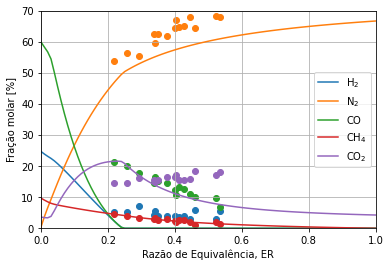

In [13]:
fig4 = plt.figure()
plt.scatter(ER, H2)
plt.scatter(ER, N2)
plt.scatter(ER, CO)
plt.scatter(ER, CH4)
plt.scatter(ER, CO2)
plt.plot(ER_list, y4[:,0], label='$\mathregular{H_2}$')
plt.plot(ER_list, y4[:,1], label='$\mathregular{N_2}$')
plt.plot(ER_list, y4[:,2], label='$\mathregular{CO}$')
plt.plot(ER_list, y4[:,3], label='$\mathregular{CH_4}$')
plt.plot(ER_list, y4[:,4], label='$\mathregular{CO_2}$')
plt.legend()
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 70)
plt.xlabel('Razão de Equivalência, ER')
plt.ylabel('Fração molar [%]')
#plt.title('Composição de Equilíbrio vs. Razão de Equivalência')
plt.savefig('results/Baratieri4')
plt.show()

In [14]:
species = ['H2', 'N2', 'CO', 'CH4', 'CO2', 'H2O']
ER_list = np.arange(0, 1+0.01, 0.01)
y5 = np.zeros((len(ER_list), len(species)))

for i, er in enumerate(ER_list):
    results = g.gasifier(avg, moist=fu.moisture(avg), T=1100, P=1.013*10**5, air=er, C=1.0, CH4=0.0)
    report = results[0]
    for j, sp in enumerate(species):
        y5[i,j] = report[sp]*100

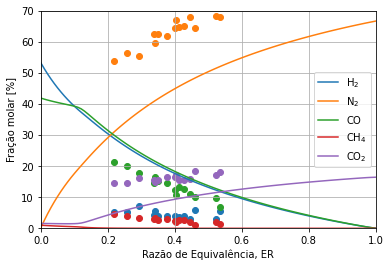

In [15]:
fig5 = plt.figure()
plt.scatter(ER, H2)
plt.scatter(ER, N2)
plt.scatter(ER, CO)
plt.scatter(ER, CH4)
plt.scatter(ER, CO2)
plt.plot(ER_list, y5[:,0], label='$\mathregular{H_2}$')
plt.plot(ER_list, y5[:,1], label='$\mathregular{N_2}$')
plt.plot(ER_list, y5[:,2], label='$\mathregular{CO}$')
plt.plot(ER_list, y5[:,3], label='$\mathregular{CH_4}$')
plt.plot(ER_list, y5[:,4], label='$\mathregular{CO_2}$')
plt.legend()
plt.grid()
plt.xlim(0, 1)
plt.ylim(0, 70)
plt.xlabel('Razão de Equivalência, ER')
plt.ylabel('Fração molar [%]')
#plt.title('Composição de Equilíbrio vs. Razão de Equivalência')
plt.savefig('results/Baratieri5')
plt.show()